---
 #   <u> Portfolio Performance </u> <img align="right" width="100" height="100" src="https://pbs.twimg.com/profile_images/1100737424672595968/FqLNWxsX_400x400.png">
 


<img align="right" width="200" height="100" src="https://www.qub.ac.uk/home/brand/file-store/Filetoupload,775229,en.jpg">


<br>

---

This notebook details the process for turning daily stock prices, for both the FTSE 350 (NMX) and QSMF constituents, into insightful charts. The data was retrieved from the Bloomberg Terminal, and all prices are loaded into dataframes from CSV files.

In [3]:
#Necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

---

#### QSMF Constituents
<br>

---

In [2]:
#QSMF consituents, since March for barchart
SMF = pd.read_csv("FundPerformance.csv")

#Set Index
SMF.set_index("Dates",inplace=True)

#Note I drop Royal Dutch Shell class A as the vast majority of our holdings of Shell are in class B, and 
# the returns are very close anyway.
SMF.drop('RDSA NA Equity',axis=1,inplace=True)

#Set dates as python recognisable dates
SMF.index = pd.to_datetime(SMF.index, format='%m/%d/%Y')

SMF.head()

,IHG LN Equity,DNLM LN Equity,GRG LN Equity,ULVR LN Equity,DGE LN Equity,TSCO LN Equity,TRIG LN Equity,RDSB LN Equity,INVP LN Equity,PRU LN Equity,...,FSKY LN Equity,INRG LN Equity,RTWO LN Equity,MNDI LN Equity,GLEN LN Equity,CRH LN Equity,GLRE LN Equity,BLND LN Equity,UTG LN Equity,PNN LN Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-02,4287.0,1078.0,2090,4320.0,2811.5,228.2,134.6,1712.0,309.249,1270.0,...,1959.1,566.50,62.760,1572.0,193.32,2718.0,36.250,494.0,1108.0,1110.0
2020-03-03,4274.0,1103.0,2166,4382.5,2820.5,235.1,135.4,1721.0,311.976,1263.0,...,1962.5,587.75,63.165,1611.0,191.26,2757.0,36.975,504.2,1155.0,1140.5
2020-03-04,4231.5,1094.0,2198,4459.5,2832.5,240.8,135.8,1738.6,314.703,1288.5,...,1960.8,584.75,63.010,1659.5,193.42,2786.0,37.715,503.8,1160.0,1181.5
2020-03-05,4085.5,1047.0,2138,4482.0,2806.5,240.9,136.0,1694.8,304.197,1262.0,...,1965.3,585.00,63.060,1628.0,186.74,2755.0,37.890,486.1,1152.0,1183.5
2020-03-06,4031.5,1037.0,2180,4352.0,2740.0,240.6,134.2,1595.6,289.600,1193.5,...,1859.2,558.75,60.950,1591.0,174.06,2649.0,36.765,471.4,1113.0,1132.5


In [3]:
print(list(SMF.columns))

['IHG LN Equity', 'DNLM LN Equity', 'GRG LN Equity', 'ULVR LN Equity', 'DGE LN Equity', 'TSCO LN Equity', 'TRIG LN Equity', 'RDSB LN Equity', 'INVP LN Equity', 'PRU LN Equity', 'LLOY LN Equity', 'SN/ LN Equity', 'GSK LN Equity', 'AZN LN Equity', 'SMIN LN Equity', 'KNOS LN Equity', 'FSKY LN Equity', 'INRG LN Equity', 'RTWO LN Equity', 'MNDI LN Equity', 'GLEN LN Equity', 'CRH LN Equity', 'GLRE LN Equity', 'BLND LN Equity', 'UTG LN Equity', 'PNN LN Equity']


In [4]:
#Rebase the dataframe
SMFrebased = SMF.apply(lambda series: series/series[0]*100)-100
SMFrebased.head()

,IHG LN Equity,DNLM LN Equity,GRG LN Equity,ULVR LN Equity,DGE LN Equity,TSCO LN Equity,TRIG LN Equity,RDSB LN Equity,INVP LN Equity,PRU LN Equity,...,FSKY LN Equity,INRG LN Equity,RTWO LN Equity,MNDI LN Equity,GLEN LN Equity,CRH LN Equity,GLRE LN Equity,BLND LN Equity,UTG LN Equity,PNN LN Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-03,-0.303242,2.319109,3.636364,1.446759,0.320114,3.023663,0.594354,0.525701,0.881814,-0.551181,...,0.173549,3.751103,0.645315,2.480916,-1.065591,1.434879,2.000000,2.064777,4.241877,2.747748
2020-03-04,-1.294612,1.484230,5.167464,3.229167,0.746932,5.521472,0.891530,1.553738,1.763627,1.456693,...,0.086775,3.221536,0.398343,5.566158,0.051728,2.501840,4.041379,1.983806,4.693141,6.441441
2020-03-05,-4.700257,-2.875696,2.296651,3.750000,-0.177841,5.565294,1.040119,-1.004673,-1.633635,-0.629921,...,0.316472,3.265666,0.478011,3.562341,-3.403683,1.361295,4.524138,-1.599190,3.971119,6.621622
2020-03-06,-5.959879,-3.803340,4.306220,0.740741,-2.543126,5.433830,-0.297177,-6.799065,-6.353780,-6.023622,...,-5.099280,-1.368049,-2.884003,1.208651,-9.962756,-2.538631,1.420690,-4.574899,0.451264,2.027027


In [5]:
#Inspect final row to display return
SMFreturns = SMFrebased[-1:].transpose()
SMFreturns.rename(columns={SMFreturns.columns[0]: "Return"}, inplace = True)

SMFreturns.head()

Dates,Return
IHG LN Equity,13.086074
DNLM LN Equity,11.038961
GRG LN Equity,-10.047847
ULVR LN Equity,1.712963
DGE LN Equity,3.254490


In [4]:
#Inputting weights and sector. You could simply match the sector from the FTSE350 data by ticker (index),
# but this would miss the ETFs
QSMFweights = pd.DataFrame({'Ticker': ['IHG LN Equity','DNLM LN Equity','GRG LN Equity',
                               'ULVR LN Equity','DGE LN Equity','TSCO LN Equity',
                               'TRIG LN Equity','RDSB LN Equity','INVP LN Equity',
                               'PRU LN Equity','LLOY LN Equity','SN/ LN Equity',
                               'GSK LN Equity','AZN LN Equity','SMIN LN Equity',
                               'KNOS LN Equity','FSKY LN Equity','INRG LN Equity',
                                'RTWO LN Equity','MNDI LN Equity','GLEN LN Equity',
                               'CRH LN Equity','GLRE LN Equity','BLND LN Equity',
                               'UTG LN Equity','PNN LN Equity'],
                     'Sector': ['Consumer Discretionary','Consumer Discretionary',
                               'Consumer Discretionary','Consumer Staples','Consumer Staples',
                               'Consumer Staples','Energy','Energy','Financials','Financials',
                               'Financials','Health Care','Health Care','Health Care','Industrials'
                                ,'Information Technology','Macro','Macro','Macro','Materials',
                                'Materials','Materials','Real Estate',
                                'Real Estate','Real Estate','Utilities'],
                    'Weight': [1.84,4.27,1.49,5.07,5.3,2.83,5.2,2.54,0.85,2.23,2.23,
                              3.54,2.63,2.51,3.47,8.01,10.68,8.45,3.81,5.98,0.99,3.81,2.0,0.99,3.54,4.57]})
QSMFweights.set_index('Ticker',inplace=True)

#Join with return series
#SMFportfolio = QSMFweights.join(SMFreturns)
#SMFportfolio.head()

---

Now we want to see return by sector. To do this we want to use the pandas groupby method, in order to calculate the the return of a sector which can be treated as a sub-portfolio. This is the formula to find the return of a formula, so we must weight each stock appropriately.
</u> <img align="centre" width="250" height="250" src="https://www.wallstreetmojo.com/wp-content/uploads/2019/04/Portfolio-Return-Formula.jpg">

Here, I first create a new column called product, which is the weight*return for each stock. The groupby method collapses all sectors together and the sum keyword adds the weights and products together.

---

In [7]:
#New product (weight*return) column
SMFportfolio['product']= SMFportfolio[["Weight", "Return"]].product(axis=1)

#group by sector and sum weight and product columns
gb = SMFportfolio.groupby(['Sector']).agg({'Weight':['sum'],'product':['sum']})

#divide the sum of the product by the sum of the weight
gb['QSMF'] = gb['product']/gb['Weight']

gbSMF = gb['QSMF']
gbSMF

Sector
Consumer Discretionary     7.400454
Consumer Staples           3.223591
Energy                   -10.089421
Financials               -11.699727
Health Care               -6.068777
Industrials               -2.446982
Information Technology    44.946809
Macro                     78.334889
Materials                 19.593795
Real Estate              -10.202627
Utilities                -13.081081
Name: QSMF, dtype: float64

---

#### NMX 1 year prices
<br>

---

In [8]:
#NMX 1 year prices
NMX = pd.read_csv("NMXPrices.csv").drop([0])

#Set Index
NMX.set_index("Unnamed: 0",inplace=True)
NMX.index.rename("Date",inplace=True)

#Set index as date type
NMX.index = pd.to_datetime(NMX.index, format='%m/%d/%Y')

#Start at beginning of march (2nd was the monday)
NMX = NMX.loc['2020-03-02':]

#My dataset included weekends and bank holidays as NaN's, so drop NA values
NMX = NMX.dropna()

#Cast to type, as Python seemed to interpret these numbers as strings
NMX = NMX.astype(float)

#rebase
NMX = NMX.apply(lambda series: series/series[0]*100)-100

#tail to show last 5 days and hence returns
NMX.tail()

,CSP LN Equity,BHP LN Equity,AGK LN Equity,BOY LN Equity,DNLM LN Equity,LWDB LN Equity,RIO LN Equity,HOC LN Equity,AAL LN Equity,GSS LN Equity,...,SMDS LN Equity,VTY LN Equity,AGT LN Equity,ICP LN Equity,III LN Equity,SVT LN Equity,SHB LN Equity,ATST LN Equity,FEV LN Equity,GLEN LN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-12,-8.097686,48.895790,-2.119146,1.202405,18.274583,16.262976,64.731183,23.618701,48.216415,25.409836,...,27.126146,-25.413061,24.293785,9.164589,16.420328,-8.990970,-31.911106,19.215686,16.359918,42.975378
2021-01-13,-8.954584,46.859903,-2.934203,1.536406,20.222635,16.262976,61.129032,25.197328,47.755611,23.633880,...,28.201075,-26.632573,24.011299,8.416459,17.280826,-7.734590,-32.420658,18.692810,16.768916,43.415063
2021-01-14,-8.868895,52.380952,-2.193242,2.605210,10.296846,16.782007,64.838710,22.404372,52.499187,24.180328,...,28.201075,-25.924469,24.435028,7.169576,17.584531,-8.127208,-29.235957,18.431373,15.950920,47.423960
2021-01-15,-10.239931,47.342995,-5.453468,-2.538410,11.038961,15.570934,59.838710,16.757741,44.394449,23.087432,...,22.194120,-27.340677,22.175141,5.922693,15.610447,-8.009423,-30.255061,17.254902,15.132924,44.785847
2021-01-18,-9.811482,45.341615,-6.194428,0.000000,10.482375,15.743945,60.026882,16.272010,44.123387,24.590164,...,22.889662,-27.301338,24.152542,5.673317,16.470946,-8.676875,-29.745509,17.777778,16.359918,42.871922


---

#### NMX Weighting and sector
<br>

---

In [9]:
#NMX 1 year prices
NMXdata = pd.read_csv("NMXWeights.csv")
NMXdata.drop(NMXdata.columns[-2:], axis=1,inplace=True)

#Set Index
NMXdata.set_index("Ticker",inplace=True)

#NMX sector
NMXSector = pd.read_csv("NMXSector.csv")

#Set index
NMXSector.set_index("ID",inplace=True)

#Join all data into a single dataframe
NMXdata = NMXdata.join(NMXSector)
NMXdata.head()

,Name,Weight,gics_sector_name
Ticker,,,
ULVR LN Equity,Unilever PLC,5.134967,Consumer Staples
AZN LN Equity,AstraZeneca PLC,4.623642,Health Care
HSBA LN Equity,HSBC Holdings PLC,3.770709,Financials
GSK LN Equity,GlaxoSmithKline PLC,3.184293,Health Care
DGE LN Equity,Diageo PLC,3.063038,Consumer Staples


In [10]:
#Check all weights sum to 1
print(sum(NMXdata.Weight))

99.99999100000008


In [11]:
#All necessary NMX data for the sector return bar chart

#Turn the last row of the rebased stock price dataframe into a column,-100 for return
NMXreturns = NMX[-1:].transpose()#-100

#And then join it to the previous dataframe, without the name column
NMXreturns = NMXreturns.join(NMXdata).drop(['Name'],axis=1)
NMXreturns.rename(columns={NMXreturns.columns[0]: "Return"}, inplace = True)

NMXreturns.head()

,Return,Weight,gics_sector_name
CSP LN Equity,-9.811482,0.099787,Consumer Discretionary
BHP LN Equity,45.341615,2.016851,Materials
AGK LN Equity,-6.194428,0.070024,Industrials
BOY LN Equity,0.000000,0.064260,Industrials
DNLM LN Equity,10.482375,0.053612,Consumer Discretionary


In [12]:
#Repeat the sector return process
NMXreturns['product']=NMXreturns[["Weight", "Return"]].product(axis=1)

gbNMX = NMXreturns.groupby(['gics_sector_name']).agg({'Weight':['sum'],'product':['sum']})

gbNMX['FTSE 350'] = gbNMX['product']/gbNMX['Weight']
gbNMX.drop(['Communication Services'],axis=0,inplace=True)

gbNMX = gbNMX['FTSE 350']
gbNMX

gics_sector_name
Consumer Discretionary    27.355463
Consumer Staples           1.726001
Energy                   -19.440333
Financials                -1.285853
Health Care                2.048088
Industrials               10.273203
Information Technology    14.824924
Materials                 43.761525
Real Estate               -2.768487
Utilities                 -8.092053
Name: FTSE 350, dtype: float64

In [13]:
#Concatenate NMX and QSMF returns by sector
barchartdf = pd.concat([gbNMX, gbSMF], axis=1)

barchartdf.reset_index(inplace=True)
barchartdf.rename(columns={barchartdf.columns[0]: "Sector"}, inplace = True)
barchartdf

,Sector,FTSE 350,QSMF
0,Consumer Discretionary,27.355463,7.400454
1,Consumer Staples,1.726001,3.223591
2,Energy,-19.440333,-10.089421
3,Financials,-1.285853,-11.699727
4,Health Care,2.048088,-6.068777
5,Industrials,10.273203,-2.446982
6,Information Technology,14.824924,44.946809
7,Materials,43.761525,19.593795
8,Real Estate,-2.768487,-10.202627
9,Utilities,-8.092053,-13.081081


In [14]:
#Turn data from wide to long to plot the barchart. Melt by sector
melt = pd.melt(barchartdf, id_vars=['Sector'])
melt.rename(columns={melt.columns[1]: "Fund", melt.columns[2]:'Return'}, inplace = True)
melt['Return'] = melt['Return'].div(100)

#Replace names with acroynms
melt = melt.replace({'Consumer Discretionary': 'CD', 'Consumer Staples': 'CS', 
             'Information Technology':'IT','Health Care' : 'HC','Real Estate' : 'RE'})


#This is an important bit of code which sorts the melt dataframe first by sector, then puts the SMF first for
# chart consistency
melt = melt.sort_values(by=['Sector','Fund'],ascending=[True, False])
melt

,Sector,Fund,Return
11,CD,QSMF,0.074005
0,CD,FTSE 350,0.273555
12,CS,QSMF,0.032236
1,CS,FTSE 350,0.017260
13,Energy,QSMF,-0.100894
2,Energy,FTSE 350,-0.194403
14,Financials,QSMF,-0.116997
3,Financials,FTSE 350,-0.012859
15,HC,QSMF,-0.060688
4,HC,FTSE 350,0.020481


---

## Plot the sector return bar chart
<br>

---

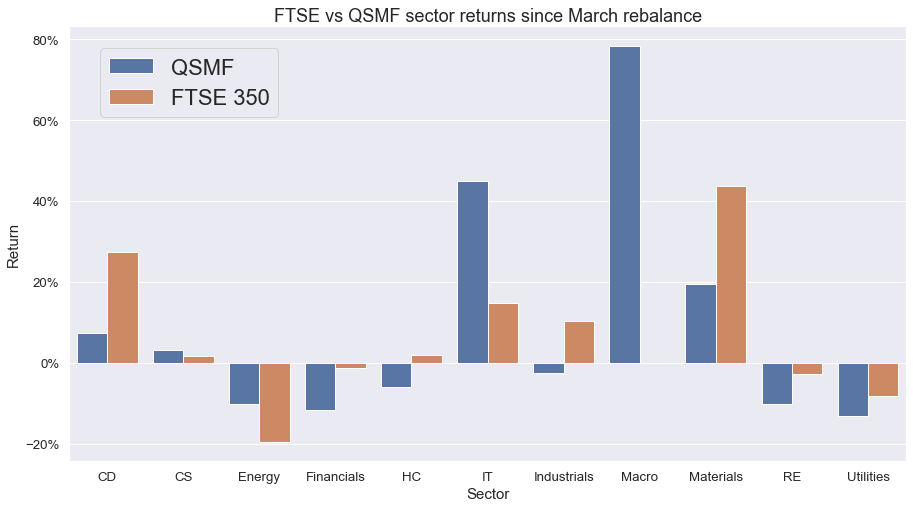

In [15]:
#Use seaborn to plot the barchart
palette ={ "QSMF": "C0","FTSE 350": "C1"}


sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="Sector", y="Return", hue="Fund",data=melt,palette=palette)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.title('FTSE vs QSMF sector returns since March rebalance',size=18)

ax.set_ylabel(ylabel='Return',size=15)
    
ax.set_xlabel(xlabel='Sector',size=15)

plt.legend(bbox_to_anchor=(0.25, 0.95), borderaxespad=0.,fontsize=22)

#plt.savefig("Bar Chart.png",dpi=330)

---

## Plot the time series chart
<br>

---

In [16]:
#Create a pandas series for the weights of the portfolio constituents. Divide by 100 to decimalise.
#Note the 1.7 is because the portfolio holds 1.7% cash
weightseries = QSMFweights['Weight'].div(100)

SMFreturn = SMFrebased.dot(weightseries)
SMFreturn

Dates
2020-03-02     0.000000
2020-03-03     1.702054
2020-03-04     2.451221
2020-03-05     1.101718
2020-03-06    -2.067874
                ...    
2021-01-11    23.681990
2021-01-12    22.758143
2021-01-13    23.435936
2021-01-14    23.262956
2021-01-15    21.392529
Length: 230, dtype: float64

In [17]:
#I downloaded the NMX prices from the Bloomberg Terminal again
NMXIndex = pd.read_csv("NMXIndex.csv").dropna()
NMXIndex.set_index('Dates',inplace=True)
NMXIndex = NMXIndex.astype(float)
NMXIndex = NMXIndex.apply(lambda series: series/series[0]*100)
NMXIndex = NMXIndex-100
NMXIndex.index = pd.to_datetime(NMXIndex.index, format='%m/%d/%Y')
NMXIndex.rename(columns={NMXIndex.columns[0]: "NMXIndex"}, inplace = True)

#Join with QSMF returns
fundreturn = NMXIndex.merge(SMFreturn.rename('SMF'), left_index=True, right_index=True)
fundreturn

,NMXIndex,SMF
Dates,,
2020-03-03,0.000000,1.702054
2020-03-04,1.250155,2.451221
2020-03-05,-0.475534,1.101718
2020-03-06,-3.971220,-2.067874
2020-03-09,-11.138775,-8.148638
...,...,...
2021-01-11,1.953565,23.681990
2021-01-12,1.350378,22.758143
2021-01-13,1.161009,23.435936


In [30]:
#Function which keeps graph formatting consistent
def myfmt(ax):
        #Set minor ticks as the month of July (1H and 2H intervals), and major ticks as the year
        ax.xaxis.set_minor_locator(mdates.MonthLocator(()))
        ax.xaxis.set_major_locator(mdates.YearLocator())

        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

        # newline "\n" to put the years below the dates
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
        
        #Shift the ticks down for a cleaner look. Increase the tick label size for readability 
        ax.tick_params(which='both', length=5,labelsize=20)

        
        
        leg = plt.legend(bbox_to_anchor=(0.05, 0.95), loc='upper left', borderaxespad=0.,fontsize=22)

        leg_lines = leg.get_lines()
        
        # bulk-set the properties of all lines and texts
        plt.setp(leg_lines, linewidth=4)

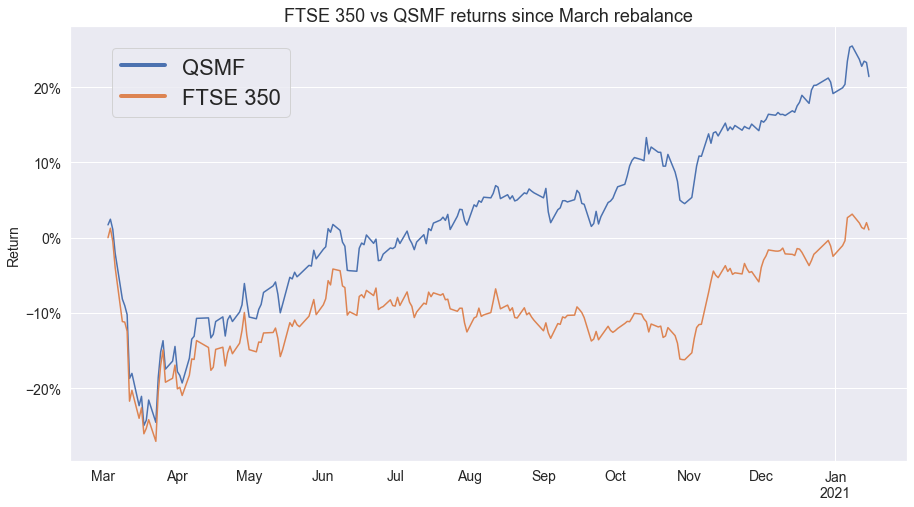

In [19]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 8))

#add the two time series, 
ax.plot(fundreturn.index, fundreturn.SMF, label='QSMF')
ax.plot(fundreturn.index, fundreturn.NMXIndex, label="FTSE 350")


#add a title
plt.title('FTSE 350 vs QSMF returns since March rebalance',size=18)

myfmt(ax)

#plt.savefig("Returns.png",dpi=330)

---

## Pie chart
<br>

---

In [20]:
QSMFweights.head()

,Sector,Weight
Ticker,,
IHG LN Equity,Consumer Discretionary,1.84
DNLM LN Equity,Consumer Discretionary,4.27
GRG LN Equity,Consumer Discretionary,1.49
ULVR LN Equity,Consumer Staples,5.07
DGE LN Equity,Consumer Staples,5.30


In [21]:
#QSMFweights.plot(kind='pie', subplots=True, figsize=(8, 8))

In [22]:
#fig1, ax1 = plt.subplots(figsize=(10, 10))
#ax1.pie(QSMFweights.Weight, labels=QSMFweights.index, autopct='%1.2f%%',
        #shadow=False, startangle=90,radius=1)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

---

## Sector graphs
<br>

---

The next section details the process for plotting each SMF sector against the respective FTSE 350 sector. I just repeated this code again and changed the sector in this line of code

```CD = NMXdata[NMXdata['gics_sector_name'].str.contains("Consumer Discretionary")]``` 


to

```CD = NMXdata[NMXdata['gics_sector_name'].str.contains("Real Estate")]``` for example.

In [23]:
#The FTSE 350 is made up of a lot of investment vehicles that don't have a sector
#Let's drop them to prevent errors occuring in the following chunks of code
NA =  NMXdata[NMXdata.isna().any(axis=1)]
NA

,Name,Weight,gics_sector_name
Ticker,,,
SMT LN Equity,Scottish Mortgage Investment Trust PLC,0.823962,NaN
PSH LN Equity,Pershing Square Holdings Ltd/Fund,0.197470,NaN
FCIT LN Equity,F&C Investment Trust PLC,0.196725,NaN
HICL LN Equity,Hicl Infrastructure PLC,0.150488,NaN
PCT LN Equity,Polar Capital Technology Trust PLC,0.143217,NaN
...,...,...,...
NESF LN Equity,NextEnergy Solar Fund Ltd,0.028632,NaN
FSFL LN Equity,Foresight Solar Fund Ltd,0.028601,NaN
JLEN LN Equity,JLEN Environmental Assets Group Ltd,0.028151,NaN


In [24]:
#drop NA values
NMXdata = NMXdata.dropna()
NMXdata.head()

,Name,Weight,gics_sector_name
Ticker,,,
ULVR LN Equity,Unilever PLC,5.134967,Consumer Staples
AZN LN Equity,AstraZeneca PLC,4.623642,Health Care
HSBA LN Equity,HSBC Holdings PLC,3.770709,Financials
GSK LN Equity,GlaxoSmithKline PLC,3.184293,Health Care
DGE LN Equity,Diageo PLC,3.063038,Consumer Staples


---

##### Consumer Discretionary 
<br>

---

In [25]:
#Create a new dataframe of companies that are in the CD sector
CD = NMXdata[NMXdata['gics_sector_name'].str.contains("Consumer Discretionary")]
CD = CD.drop(['gics_sector_name','Name'],axis=1)
CD = CD.sort_index()

#Divide the FTSE 350 weights by the total sector weight
CD = CD.div(sum(CD['Weight']))
CD.head()

,Weight
Ticker,
888 LN Equity,0.004202
AML LN Equity,0.004957
AO/ LN Equity,0.005508
BDEV LN Equity,0.035752
BKG LN Equity,0.026356


In [26]:
#Match the companies (the index) from the above dataframe to the stock price dataframe
CDlist = list(CD.index)

#select columns from master NMX dataframe that are in the sector
CDprices =  NMX[[col for col in NMX.columns if col in CDlist]]

#sort columns alphabetically
CDprices = CDprices.sort_index(axis=1)
CDprices.head()

,888 LN Equity,AML LN Equity,AO/ LN Equity,BDEV LN Equity,BKG LN Equity,BME LN Equity,BRBY LN Equity,BWY LN Equity,CCL LN Equity,COA LN Equity,...,SSPG LN Equity,TIFS LN Equity,TRN LN Equity,TUI LN Equity,TW/ LN Equity,VTY LN Equity,VVO LN Equity,WMH LN Equity,WOSG LN Equity,WTB LN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-03,-2.930403,0.618554,-0.154799,0.986141,1.625158,2.030303,2.498495,2.965986,-0.171453,-0.253593,...,3.907075,2.842105,6.974128,3.151476,2.414983,3.147128,5.050505,1.386001,4.350490,0.239422
2020-03-04,-1.098901,2.233689,-4.024768,3.091684,3.123681,0.121212,2.588802,2.394558,-1.414488,-1.775148,...,2.639916,8.157895,10.573678,-1.287703,4.041400,2.596381,1.818182,-3.153153,7.230392,-3.697793
2020-03-05,0.457875,2.233689,-3.869969,0.453092,0.928662,-1.545455,0.210716,0.081633,-8.572653,-0.422654,...,-1.900739,2.210526,1.912261,-8.437821,1.478561,0.078678,3.030303,-7.172557,6.801471,-3.458370
2020-03-06,-1.831502,-8.625452,-3.715170,-2.452026,-2.279443,-4.000000,-3.792896,-2.448980,-15.066438,-4.395604,...,-2.851109,-1.789474,-6.636670,-9.691640,-1.651060,-2.911094,1.010101,-7.449757,6.127451,-6.863543


In [27]:
#Use matrix multiplication to find the daily portfolio return
CDsector = CDprices.dot(CD)
CDsector = CDsector.rename({"Weight":"FTSE_CD"},axis=1)
CDsector

,FTSE_CD
Date,
2020-03-02,0.000000
2020-03-03,1.795667
2020-03-04,1.393474
2020-03-05,-1.329530
2020-03-06,-4.023852
...,...
2021-01-12,28.990020
2021-01-13,28.265132
2021-01-14,28.414514


---

###### Now the same for the SMF CD sector
<br>

---

In [28]:
CDsmf = QSMFweights[QSMFweights['Sector'].str.contains("Consumer Discretionary")]
CDsmf = CDsmf.sort_index()
CDsmf = CDsmf.drop(['Sector'],axis=1)
CDsmf = CDsmf.div(sum(CDsmf['Weight']))

CDlistQSMF = list(CDsmf.index)

#select columns from master NMX dataframe that are in the sector
CDpricesQSMF =  SMFrebased[[col for col in SMF.columns if col in CDlistQSMF]]

#sort columns alphabetically
CDpricesQSMF = CDpricesQSMF.sort_index(axis=1)

CDsectorQSMF = CDpricesQSMF.dot(CDsmf)
CDsectorQSMF = CDsectorQSMF.rename({"Weight":"SMF_CD"},axis=1)
CDsectorQSMF
#join CD sectors on single dataframe
CDdf = CDsectorQSMF.join(CDsector['FTSE_CD'])
CDdf

,SMF_CD,FTSE_CD
Dates,,
2020-03-02,0.000000,0.000000
2020-03-03,1.942475,1.795667
2020-03-04,1.533566,1.393474
2020-03-05,-2.303379,-1.329530
2020-03-06,-2.735549,-4.023852
...,...,...
2021-01-11,11.928002,29.509373
2021-01-12,11.023506,28.990020
2021-01-13,11.824815,28.265132


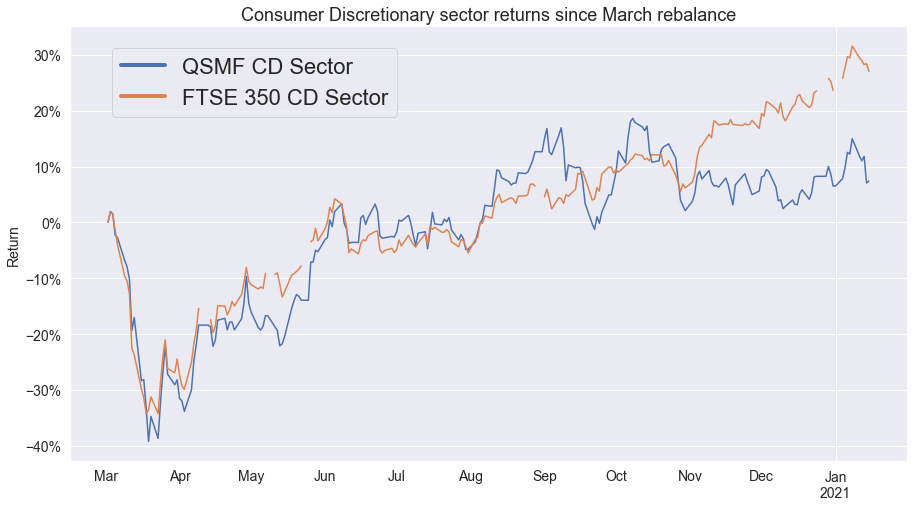

In [29]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 8))

#add the two time series, 
ax.plot(CDdf.index, CDdf.SMF_CD, label="QSMF CD Sector")
ax.plot(CDdf.index, CDdf.FTSE_CD, label='FTSE 350 CD Sector')

#add a title
plt.title('Consumer Discretionary sector returns since March rebalance',size=18)

myfmt(ax)
#plt.savefig("CD.png",dpi=330)

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

ASX = pd.read_csv("Book2.csv")
ASX = ASX.set_index('Date')
ASX = ASX.drop(['ASX','AAF'],axis=1)
ASX.rename(columns={ASX.columns[0]: "ASX", ASX.columns[1]: 'AAF'}, inplace = True)
ASX.index = pd.to_datetime(ASX.index,format='%m/%d/%Y')
ASX= ASX-100
ASX

,ASX,AAF
Date,,
2019-06-27,0.000000,0.000
2019-06-28,0.375088,-15.250
2019-07-01,1.322704,-11.250
2019-07-02,2.013499,-10.000
2019-07-03,2.680789,-9.875
...,...,...
2021-03-22,-5.138159,5.250
2021-03-23,-5.551844,1.750
2021-03-24,-5.324466,1.250


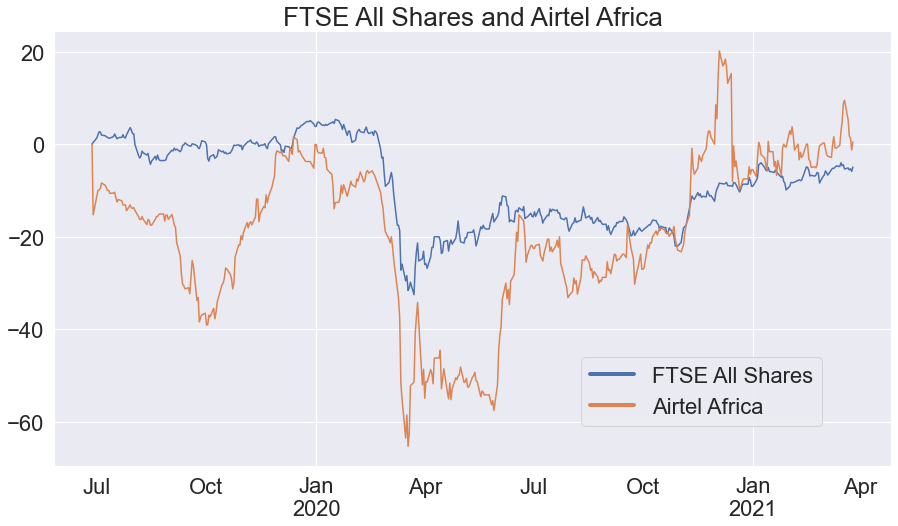

In [31]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(15, 8))

#add the two time series, 
ax.plot(ASX.index, ASX.ASX, label="FTSE All Shares")
ax.plot(ASX.index, ASX.AAF, label='Airtel Africa')

plt.title("FTSE All Shares and Airtel Africa",fontsize=26)

leg = plt.legend(bbox_to_anchor=(0.63, 0.25), loc='upper left', borderaxespad=0.,fontsize=22)
leg_lines = leg.get_lines()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)


ax.xaxis.set_minor_locator(mdates.MonthLocator((1,4,7,10))) 
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y")) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
ax.tick_params(which='minor', length=8)

plt.savefig("ASX.png",dpi=330)

# Rebalance Event



In [5]:
#QSMF consituents, since April for barchart
SMF = pd.read_csv("SMFPricesApril.csv")

#Set Index
SMF.set_index("Dates",inplace=True)

#Note I drop Royal Dutch Shell class A as the vast majority of our holdings of Shell are in class B, and 
# the returns are very close anyway.
#SMF.drop('RDSA NA Equity',axis=1,inplace=True)

#Set dates as python recognisable dates
SMF.index = pd.to_datetime(SMF.index, format='%m/%d/%Y')

SMF.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SMFPricesApril.csv'

In [33]:
#Rebase the dataframe
SMFrebased = SMF.apply(lambda series: series/series[0]*100)-100
SMFrebased.head()

,IHG LN Equity,DNLM LN Equity,GRG LN Equity,ULVR LN Equity,DGE LN Equity,TSCO LN Equity,TRIG LN Equity,RDSB LN Equity,INVP LN Equity,PRU LN Equity,...,FSKY LN Equity,INRG LN Equity,RTWO LN Equity,MNDI LN Equity,GLEN LN Equity,CRH LN Equity,GLRE LN Equity,BLND LN Equity,UTG LN Equity,PNN LN Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2020-04-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-14,-7.951482,3.446227,-1.005025,1.770126,-0.341815,1.335979,-2.096140,-3.464674,-0.029949,-3.151862,...,2.886284,-0.901085,-0.808081,-1.074074,-1.119094,-6.627762,-1.698019,-2.657240,-6.807780,1.423978
2020-04-15,-12.129380,-1.901367,-2.624232,0.290980,-0.493733,0.258620,-4.191527,-10.611413,-8.745133,-8.481375,...,3.348930,-3.501946,-4.290524,-5.481481,-7.129041,-12.838683,-5.843183,-7.581667,-11.155606,0.918695


In [34]:
#Inspect final row to display return
SMFreturns = SMFrebased[-1:].transpose()
SMFreturns.rename(columns={SMFreturns.columns[0]: "Return"}, inplace = True)

SMFreturns.head()

Dates,Return
IHG LN Equity,39.137466
DNLM LN Equity,63.161022
GRG LN Equity,24.399777
ULVR LN Equity,0.169738
DGE LN Equity,20.888720


In [35]:
#Join with return series
SMFportfolio = QSMFweights.join(SMFreturns)
SMFportfolio.head()

,Sector,Weight,Return
Ticker,,,
IHG LN Equity,Consumer Discretionary,1.84,39.137466
DNLM LN Equity,Consumer Discretionary,4.27,63.161022
GRG LN Equity,Consumer Discretionary,1.49,24.399777
ULVR LN Equity,Consumer Staples,5.07,0.169738
DGE LN Equity,Consumer Staples,5.30,20.888720


In [36]:
#New product (weight*return) column
SMFportfolio['product']= SMFportfolio[["Weight", "Return"]].product(axis=1)

#group by sector and sum weight and product columns
gb = SMFportfolio.groupby(['Sector']).agg({'Weight':['sum'],'product':['sum']})

#divide the sum of the product by the sum of the weight
gb['QSMF'] = gb['product']/gb['Weight']

gbSMF = gb['QSMF']
gbSMF

Sector
Consumer Discretionary     49.745549
Consumer Staples            4.113851
Energy                     -8.964981
Financials                 39.131091
Health Care                -8.009418
Industrials                30.436540
Information Technology    140.320233
Macro                      78.558869
Materials                  48.672961
Real Estate                23.746873
Utilities                  -6.706477
Name: QSMF, dtype: float64

In [37]:
#NMX 1 year prices
NMX = pd.read_csv("NMXPricesApril.csv")#.drop([0])

#Set Index
NMX.set_index("DATES",inplace=True)
NMX.index.rename("Date",inplace=True)

#Set index as date type
NMX.index = pd.to_datetime(NMX.index, format='%m/%d/%Y')

#My dataset included weekends and bank holidays as NaN's, so drop NA values
NMX = NMX.dropna()

#Cast to type, as Python seemed to interpret these numbers as strings
NMX = NMX.astype(float)

#rebase
NMX = NMX.apply(lambda series: series/series[0]*100)-100

#tail to show last 5 days and hence returns
NMX.tail()

,CSP LN Equity,BHP LN Equity,AGK LN Equity,BOY LN Equity,DNLM LN Equity,LWDB LN Equity,RIO LN Equity,HOC LN Equity,AAL LN Equity,GSS LN Equity,...,VTY LN Equity,AGT LN Equity,ICP LN Equity,SVT LN Equity,III LN Equity,SHB LN Equity,ATST LN Equity,FEV LN Equity,TCAP LN Equity,GLEN LN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,18.481244,0.266667,45.107794,18.581560,11.373210,11.059908,-3.605981,-3.250478,18.499591,1.897321,...,28.387850,10.904872,10.069646,-1.241438,4.125998,17.631103,6.129398,-0.713012,25.816099,14.857258
2021-04-06,18.481244,2.690909,45.356551,20.567376,12.552654,13.671275,-1.020229,0.000000,21.156991,1.227679,...,30.373832,12.064965,10.475914,0.042808,6.832298,17.902351,7.832009,0.534759,25.256125,17.269803
2021-04-07,18.938701,4.872727,44.941957,20.425532,13.563606,15.053763,1.020229,-1.338432,22.158626,2.455357,...,31.775701,13.921114,12.391178,1.027397,7.453416,18.535262,8.513053,1.960784,27.546930,17.852835
2021-04-08,18.938701,5.163636,45.107794,21.418440,16.343724,15.668203,1.231310,-0.095602,26.083401,2.455357,...,33.177570,13.689095,15.293093,2.354452,11.180124,16.184448,9.534620,3.386809,26.096087,18.335344
2021-04-09,19.281793,4.242424,44.776119,21.347518,15.669756,14.746544,-0.386983,-2.103250,26.042518,2.455357,...,36.214953,15.313225,14.219385,2.996575,10.115350,13.562387,9.648127,4.278075,23.041680,16.083635


In [38]:
#NMX 1 year prices
NMXdata = pd.read_csv("NMXWeightsApril.csv")
#NMXdata.drop(NMXdata.columns[-2:], axis=1,inplace=True)

#Set Index
NMXdata.set_index("Ticker",inplace=True)

#NMX sector
NMXSector = pd.read_csv("NMXSector.csv")

#Set index
NMXSector.set_index("ID",inplace=True)

#Join all data into a single dataframe
NMXdata = NMXdata.join(NMXSector)
NMXdata.head()

,Name,Weight,gics_sector_name
Ticker,,,
ULVR LN Equity,Unilever PLC,4.646560,Consumer Staples
AZN LN Equity,AstraZeneca PLC,4.258587,Health Care
HSBA LN Equity,HSBC Holdings PLC,3.900654,Financials
DGE LN Equity,Diageo PLC,3.216566,Consumer Staples
GSK LN Equity,GlaxoSmithKline PLC,2.851931,Health Care


In [39]:
#All necessary NMX data for the sector return bar chart

#Turn the last row of the rebased stock price dataframe into a column,-100 for return
NMXreturns = NMX[-1:].transpose()#-100

#And then join it to the previous dataframe, without the name column
NMXreturns = NMXreturns.join(NMXdata).drop(['Name'],axis=1)
NMXreturns.rename(columns={NMXreturns.columns[0]: "Return"}, inplace = True)

NMXreturns.head()

,Return,Weight,gics_sector_name
CSP LN Equity,19.281793,0.118837,Consumer Discretionary
BHP LN Equity,4.242424,1.962642,Materials
AGK LN Equity,44.776119,0.093093,Industrials
BOY LN Equity,21.347518,0.070201,Industrials
DNLM LN Equity,15.669756,0.069558,Consumer Discretionary


In [40]:
#Repeat the sector return process
NMXreturns['product']=NMXreturns[["Weight", "Return"]].product(axis=1)

gbNMX = NMXreturns.groupby(['gics_sector_name']).agg({'Weight':['sum'],'product':['sum']})

gbNMX['FTSE 350'] = gbNMX['product']/gbNMX['Weight']
gbNMX.drop(['Communication Services'],axis=0,inplace=True)

gbNMX = gbNMX['FTSE 350']
gbNMX

gics_sector_name
Consumer Discretionary    13.419426
Consumer Staples           0.526481
Energy                     3.770253
Financials                16.897179
Health Care               -4.497754
Industrials               10.911922
Information Technology     9.079266
Materials                  9.116699
Real Estate                8.020362
Utilities                  3.709810
Name: FTSE 350, dtype: float64

In [41]:
#Concatenate NMX and QSMF returns by sector
barchartdf = pd.concat([gbNMX, gbSMF], axis=1)

barchartdf.reset_index(inplace=True)
barchartdf.rename(columns={barchartdf.columns[0]: "Sector"}, inplace = True)
barchartdf

,Sector,FTSE 350,QSMF
0,Consumer Discretionary,13.419426,49.745549
1,Consumer Staples,0.526481,4.113851
2,Energy,3.770253,-8.964981
3,Financials,16.897179,39.131091
4,Health Care,-4.497754,-8.009418
5,Industrials,10.911922,30.436540
6,Information Technology,9.079266,140.320233
7,Materials,9.116699,48.672961
8,Real Estate,8.020362,23.746873
9,Utilities,3.709810,-6.706477


In [42]:
#Turn data from wide to long to plot the barchart. Melt by sector
melt = pd.melt(barchartdf, id_vars=['Sector'])
melt.rename(columns={melt.columns[1]: "Fund", melt.columns[2]:'Return'}, inplace = True)
melt['Return'] = melt['Return'].div(100)

#Replace names with acroynms
melt = melt.replace({'Consumer Discretionary': 'CD', 'Consumer Staples': 'CS', 
             'Information Technology':'IT','Health Care' : 'HC','Real Estate' : 'RE'})


#This is an important bit of code which sorts the melt dataframe first by sector, then puts the SMF first for
# chart consistency
melt = melt.sort_values(by=['Sector','Fund'],ascending=[True, False])
melt

,Sector,Fund,Return
11,CD,QSMF,0.497455
0,CD,FTSE 350,0.134194
12,CS,QSMF,0.041139
1,CS,FTSE 350,0.005265
13,Energy,QSMF,-0.089650
2,Energy,FTSE 350,0.037703
14,Financials,QSMF,0.391311
3,Financials,FTSE 350,0.168972
15,HC,QSMF,-0.080094
4,HC,FTSE 350,-0.044978


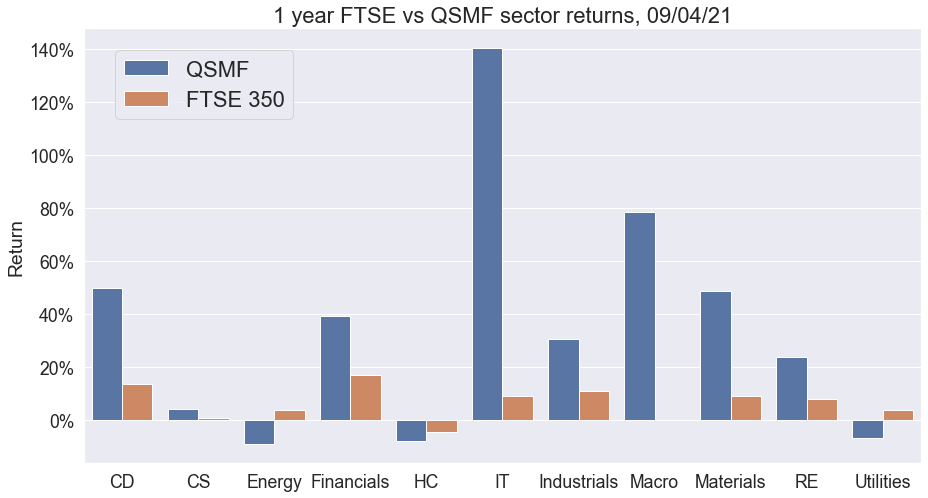

In [66]:
#Use seaborn to plot the barchart
palette ={ "QSMF": "C0","FTSE 350": "C1"}


sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="Sector", y="Return", hue="Fund",data=melt,palette=palette)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.title('1 year FTSE vs QSMF sector returns, 09/04/21',size=22)

ax.set_ylabel(ylabel='Return')
ax.set_xlabel(xlabel='')
    


plt.legend(bbox_to_anchor=(0.25, 0.95), borderaxespad=0.,fontsize=22)

plt.savefig("Bar Chart RB.png",dpi=1000)

## Line Graph

In [44]:
#Create a pandas series for the weights of the portfolio constituents. Divide by 100 to decimalise.
#Note the 1.7 is because the portfolio holds 1.7% cash
weightseries = QSMFweights['Weight'].div(100)

SMFreturn = SMFrebased.dot(weightseries)
SMFreturn

Dates
2020-04-09     0.000000
2020-04-10     0.000000
2020-04-13     0.000000
2020-04-14    -0.068514
2020-04-15    -3.203591
                ...    
2021-04-05    38.704846
2021-04-06    40.321035
2021-04-07    40.224101
2021-04-08    41.302819
2021-04-09    41.820777
Length: 262, dtype: float64

In [45]:
#I downloaded the NMX prices from the Bloomberg Terminal again
NMXIndex = pd.read_csv("NMXPriceApril.csv").dropna()
NMXIndex.set_index('Dates',inplace=True)
NMXIndex = NMXIndex.astype(float)
NMXIndex = NMXIndex.apply(lambda series: series/series[0]*100)
NMXIndex = NMXIndex-100
NMXIndex.index = pd.to_datetime(NMXIndex.index, format='%m/%d/%Y')
NMXIndex.rename(columns={NMXIndex.columns[0]: "NMXIndex"}, inplace = True)

#Join with QSMF returns
fundreturn = NMXIndex.merge(SMFreturn.rename('SMF'), left_index=True, right_index=True)
fundreturn

,NMXIndex,SMF
Dates,,
2020-04-09,0.000000,0.000000
2020-04-14,-1.064883,-0.068514
2020-04-15,-4.575696,-3.203591
2020-04-16,-4.105877,-2.744252
2020-04-17,-1.356000,-0.709537
...,...,...
2021-04-01,18.163490,38.704846
2021-04-06,19.659702,40.321035
2021-04-07,20.709616,40.224101


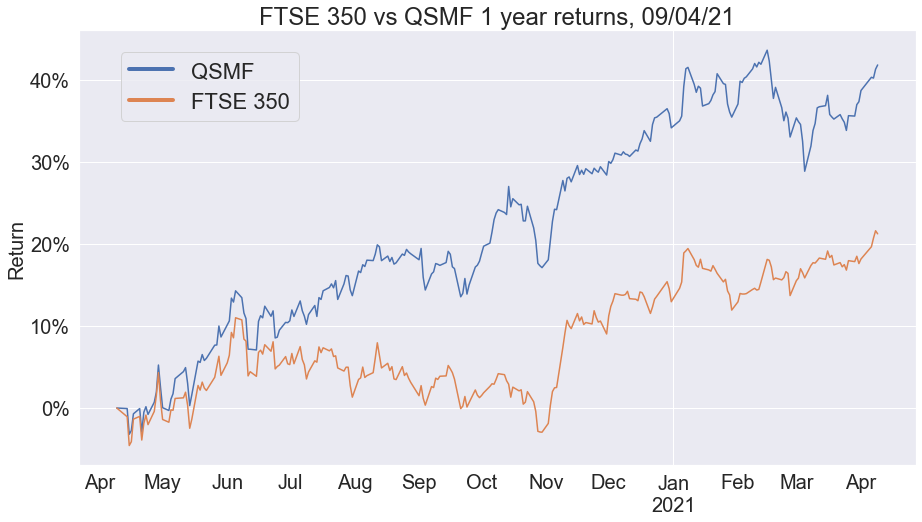

In [60]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(15, 8))

#add the two time series, 
ax.plot(fundreturn.index, fundreturn.SMF, label='QSMF')
ax.plot(fundreturn.index, fundreturn.NMXIndex, label="FTSE 350")


#add a title
plt.title('FTSE 350 vs QSMF 1 year returns, 09/04/21')

myfmt(ax)

plt.savefig("Returns.png",dpi=1000)

<br>

# June Annual Report

<br>
<br>

In [9]:
NMXPricesJune = pd.read_csv("NMXJune.csv")#.dropna()
NMXPricesJune = NMXPricesJune.set_index('Date')
NMXPricesJune = NMXPricesJune.apply(lambda series: series/series[0]*100)-100
NMXPricesJune.tail()

,REDD LN Equity,TCAP LN Equity,AVON LN Equity,MSLH LN Equity,SAFE LN Equity,WIZZ LN Equity,INCH LN Equity,USA LN Equity,KGF LN Equity,MGNS LN Equity,...,GCP LN Equity,SN/ LN Equity,WG/ LN Equity,BRW LN Equity,LSEG LN Equity,CWK LN Equity,JAM LN Equity,EXPN LN Equity,BDEV LN Equity,BKG LN Equity
Date,,,,,,,,,,,,,,,,,,,,,
07/06/2021,112.707182,-27.471398,-3.633277,14.912281,45.117335,47.229381,59.338443,62.597403,76.458547,93.379791,...,-11.627907,-6.712244,31.508951,31.636364,-6.869286,16.923957,36.382979,-1.701183,48.111025,16.047256
08/06/2021,113.259669,-27.779447,-4.380306,13.476874,46.101438,50.064433,58.935054,63.636364,75.230297,91.637631,...,-12.611807,-8.483530,30.741688,34.181818,-6.770447,16.695254,36.170213,0.036982,46.183500,15.702683
09/06/2021,112.430939,-29.422379,-5.874363,10.925040,44.360333,54.961340,56.716418,64.935065,73.848516,90.331010,...,-12.701252,-6.401492,29.872123,33.818182,-7.388189,16.866781,36.170213,-0.036982,42.868157,13.290672
10/06/2021,110.497238,-29.798885,-6.553480,9.649123,43.603331,52.158505,55.203711,63.116883,73.490276,89.024390,...,-11.449016,-4.133002,29.820972,32.727273,-6.498641,16.695254,36.170213,-0.850592,40.439476,12.330790
11/06/2021,109.392265,-29.148557,-6.621392,9.170654,42.997729,54.188144,55.203711,67.272727,74.769703,91.202091,...,-13.237925,-3.915475,26.342711,33.818182,-4.571287,16.409377,36.170213,0.369822,40.940632,12.847650


In [10]:
NMXReturn = NMXPricesJune[-1:].transpose()
NMXReturn

Date,11/06/2021
REDD LN Equity,109.392265
TCAP LN Equity,-29.148557
AVON LN Equity,-6.621392
MSLH LN Equity,9.170654
SAFE LN Equity,42.997729
...,...
CWK LN Equity,16.409377
JAM LN Equity,36.170213
EXPN LN Equity,0.369822
BDEV LN Equity,40.940632


In [11]:
NMXWeights = pd.read_csv("NMXWeightsJune.csv")
NMXWeights = NMXWeights.set_index('Ticker')
NMXWeights

,Weight
Ticker,
AZN LN Equity,4.807136
ULVR LN Equity,4.779315
HSBA LN Equity,3.834348
DGE LN Equity,3.481026
GSK LN Equity,3.075772
...,...
PZC LN Equity,0.020025
VVO LN Equity,0.016801
CLI LN Equity,0.016389


In [12]:
NMXSector = pd.read_csv("NMXSector.csv").set_index('ID')
NMXSector

,gics_sector_name
ID,
REDD LN Equity,Industrials
TCAP LN Equity,Financials
AVON LN Equity,Industrials
MSLH LN Equity,Materials
SAFE LN Equity,Real Estate
...,...
CWK LN Equity,Consumer Staples
JAM LN Equity,NaN
EXPN LN Equity,Industrials


In [13]:
NMX = NMXSector.join(NMXWeights)
NMX = NMX.join(NMXReturn)
NMX.rename(columns={NMX.columns[2]: "Return"}, inplace = True)
NMX

,gics_sector_name,Weight,Return
ID,,,
REDD LN Equity,Industrials,0.041482,109.392265
TCAP LN Equity,Financials,0.066648,-29.148557
AVON LN Equity,Industrials,0.033068,-6.621392
MSLH LN Equity,Materials,0.058082,9.170654
SAFE LN Equity,Real Estate,0.085742,42.997729
...,...,...,...
CWK LN Equity,Consumer Staples,0.090363,16.409377
JAM LN Equity,NaN,0.055498,36.170213
EXPN LN Equity,Industrials,1.095390,0.369822


###### QSMF

In [14]:
QSMF = pd.read_csv('QSMFJune.csv').drop([0],axis=0)
QSMF.rename(columns={QSMF.columns[0]: "Date"}, inplace = True)
QSMF = QSMF.set_index('Date')

QSMF = QSMF.astype(float)
QSMF = QSMF.apply(lambda series: series/series[0]*100)-100

QSMF.tail()

,IHG LN Equity,DNLM LN Equity,GRG LN Equity,ULVR LN Equity,DGE LN Equity,TSCO LN Equity,TRIG LN Equity,RDSB LN Equity,INVP LN Equity,PRU LN Equity,...,FSKY LN Equity,INRG LN Equity,RTWO LN Equity,MNDI LN Equity,GLEN LN Equity,CRH LN Equity,GLRE LN Equity,BLND LN Equity,UTG LN Equity,PNN LN Equity
Date,,,,,,,,,,,,,,,,,,,,,
07/06/2021,29.127726,30.572687,55.562273,-0.882900,22.859712,-21.262041,4.754690,1.761372,84.436494,29.159370,...,28.090988,62.996595,70.025123,33.240321,87.826390,40.059791,32.109490,25.696295,26.692140,-0.592525
08/06/2021,34.112150,29.955947,57.255139,-0.627323,22.859712,-21.035181,5.243437,0.873028,82.230173,28.721541,...,29.114062,63.269012,70.778827,34.391350,87.855402,40.209268,32.929028,27.343182,28.165939,0.273473
09/06/2021,35.254413,27.665198,58.282950,-0.650558,24.460432,-20.930476,5.732183,2.083014,78.890877,27.101576,...,30.550718,65.266742,72.095642,32.821765,84.896136,37.742900,33.781347,25.454105,28.548035,0.729262
10/06/2021,32.139148,25.903084,53.567110,-0.546004,24.352518,-20.424403,5.406352,3.093889,78.056052,28.984238,...,30.387462,63.405221,70.761500,33.728636,85.621446,37.817638,33.863301,22.838460,28.275109,2.051048
11/06/2021,32.917965,26.696035,54.655381,-0.708643,23.525180,-19.167946,5.895099,4.120080,80.023852,30.385289,...,31.791467,65.402951,71.671143,34.809906,90.959731,38.789238,33.355188,23.565028,25.764192,4.421149


In [36]:
QSMFReturn = QSMF[-1:].transpose()

QSMFReturn.rename(columns={QSMFReturn.columns[0]: "Return"}, inplace = True)
QSMFReturn.head()

Date,Return
IHG LN Equity,32.917965
DNLM LN Equity,26.696035
GRG LN Equity,54.655381
ULVR LN Equity,-0.708643
DGE LN Equity,23.525180


In [37]:
#Join with return series
SMFportfolio = QSMFweights.join(QSMFReturn)
SMFportfolio.head()

,Sector,Weight,Return
Ticker,,,
IHG LN Equity,Consumer Discretionary,1.84,32.917965
DNLM LN Equity,Consumer Discretionary,4.27,26.696035
GRG LN Equity,Consumer Discretionary,1.49,54.655381
ULVR LN Equity,Consumer Staples,5.07,-0.708643
DGE LN Equity,Consumer Staples,5.30,23.525180


In [38]:
#Repeat the sector return process
NMX['product']=NMX[["Weight", "Return"]].product(axis=1)

gbNMX = NMX.groupby(['gics_sector_name']).agg({'Weight':['sum'],'product':['sum']})

gbNMX['FTSE 350'] = gbNMX['product']/gbNMX['Weight']
gbNMX.drop(['Communication Services'],axis=0,inplace=True)

gbNMX = gbNMX['FTSE 350']
gbNMX

gics_sector_name
Consumer Discretionary    43.716503
Consumer Staples           4.294375
Energy                     5.443457
Financials                31.395423
Health Care                0.654211
Industrials               37.616020
Information Technology    23.257755
Materials                 50.973393
Real Estate               23.367306
Utilities                 11.811459
Name: FTSE 350, dtype: float64

In [39]:
#Repeat the sector return process
SMFportfolio['product']=SMFportfolio[["Weight", "Return"]].product(axis=1)

gbSMF = SMFportfolio.groupby(['Sector']).agg({'Weight':['sum'],'product':['sum']})

gbSMF['QSMF'] = gbSMF['product']/gbSMF['Weight']


gbSMF = gbSMF['QSMF']
gbSMF

Sector
Consumer Discretionary     33.683900
Consumer Staples            5.064041
Energy                      5.312599
Financials                 47.226268
Health Care                -4.632991
Industrials                27.821940
Information Technology    100.140845
Macro                      50.795765
Materials                  41.372947
Real Estate                27.755742
Utilities                   4.421149
Name: QSMF, dtype: float64

In [40]:
#Concatenate NMX and QSMF returns by sector
barchartdf = pd.concat([gbNMX, gbSMF], axis=1)

barchartdf.reset_index(inplace=True)
barchartdf.rename(columns={barchartdf.columns[0]: "Sector"}, inplace = True)
barchartdf.set_index('Sector')

,FTSE 350,QSMF
Sector,,
Consumer Discretionary,43.716503,33.683900
Consumer Staples,4.294375,5.064041
Energy,5.443457,5.312599
Financials,31.395423,47.226268
Health Care,0.654211,-4.632991
Industrials,37.616020,27.821940
Information Technology,23.257755,100.140845
Materials,50.973393,41.372947
Real Estate,23.367306,27.755742


In [62]:
#Turn data from wide to long to plot the barchart. Melt by sector
melt = pd.melt(barchartdf, id_vars=['Sector'])
melt.rename(columns={melt.columns[1]: "Fund", melt.columns[2]:'Return'}, inplace = True)
melt['Return'] = melt['Return'].div(100)

#Replace names with acroynms
#melt = melt.replace({'Consumer Discretionary': 'CD', 'Consumer Staples': 'CS', 
           #  'Information Technology':'IT','Health Care' : 'HC','Real Estate' : 'RE'})


#This is an important bit of code which sorts the melt dataframe first by sector, then puts the SMF first for
# chart consistency
melt = melt.sort_values(by=['Sector','Fund'],ascending=[True, False])
melt

,Sector,Fund,Return
11,Consumer Discretionary,QSMF,0.336839
0,Consumer Discretionary,FTSE 350,0.437165
12,Consumer Staples,QSMF,0.050640
1,Consumer Staples,FTSE 350,0.042944
13,Energy,QSMF,0.053126
2,Energy,FTSE 350,0.054435
14,Financials,QSMF,0.472263
3,Financials,FTSE 350,0.313954
15,Health Care,QSMF,-0.046330
4,Health Care,FTSE 350,0.006542


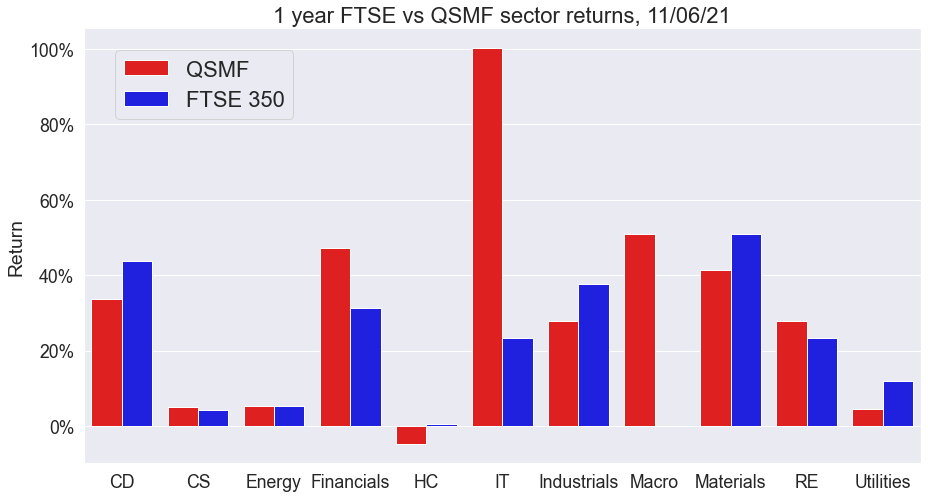

In [60]:
#Use seaborn to plot the barchart
palette ={ "QSMF": "red","FTSE 350": "blue"}


sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="Sector", y="Return", hue="Fund",data=melt,palette=palette)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.title('1 year FTSE vs QSMF sector returns, 11/06/21',size=22)

ax.set_ylabel(ylabel='Return')
ax.set_xlabel(xlabel='')
    


plt.legend(bbox_to_anchor=(0.25, 0.95), borderaxespad=0.,fontsize=22)

#plt.savefig("Bar Chart June.png",dpi=1000)

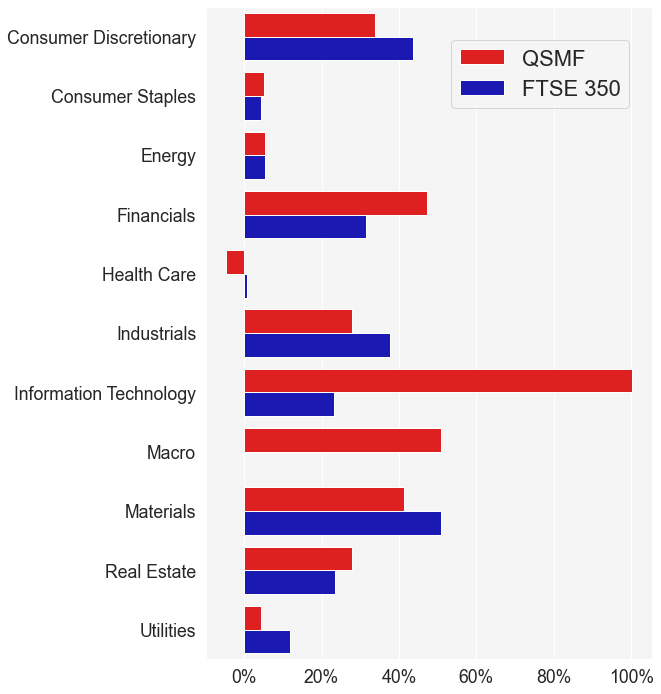

In [80]:
#Use seaborn to plot the barchart
palette ={ "QSMF": "red","FTSE 350": "mediumblue"}

sns.set()

sns.set(font_scale=1.6,rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(8, 12))

sns.barplot(x="Return", y="Sector", hue="Fund",data=melt,palette=palette)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))


ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')






plt.legend(bbox_to_anchor=(0.55, 0.95), borderaxespad=0.,fontsize=22)

fig.savefig("BarChartJune1.pdf", bbox_inches='tight',)



<br>


# Line Graph
<br>
    
<br>

In [22]:
#Create a pandas series for the weights of the portfolio constituents. Divide by 100 to decimalise.
#Note the 1.7 is because the portfolio holds 1.7% cash
weightseries = QSMFweights['Weight'].div(100)

SMFreturn = QSMF.dot(weightseries)
SMFreturn.index = pd.to_datetime(SMFreturn.index, format='%d/%m/%Y')
SMFreturn

Date
2020-06-12     0.000000
2020-06-15    -0.116645
2020-06-16     3.092918
2020-06-17     3.751226
2020-06-18     3.509409
                ...    
2021-06-07    31.564721
2021-06-08    31.815250
2021-06-09    31.905894
2021-06-10    31.602149
2021-06-11    32.858948
Length: 261, dtype: float64

In [23]:
#I downloaded the NMX prices from the Bloomberg Terminal again
NMXIndex = pd.read_csv("NMXPriceJune.csv").dropna()
NMXIndex.set_index('Date',inplace=True)
NMXIndex = NMXIndex.astype(float)
NMXIndex = NMXIndex.apply(lambda series: series/series[0]*100)
NMXIndex = NMXIndex-100
NMXIndex.index = pd.to_datetime(NMXIndex.index, format='%m/%d/%Y')
NMXIndex.rename(columns={NMXIndex.columns[0]: "NMXIndex"}, inplace = True)

#Join with QSMF returns
fundreturn = NMXIndex.merge(SMFreturn.rename('SMF'), left_index=True, right_index=True)
fundreturn

,NMXIndex,SMF
Date,,
2020-06-12,0.492696,0.000000
2020-06-15,-0.049681,-0.116645
2020-06-16,2.760099,3.092918
2020-06-17,3.019969,3.751226
2020-06-18,2.556964,3.509409
...,...,...
2021-06-07,19.525295,31.564721
2021-06-08,19.760472,31.815250
2021-06-09,19.436221,31.905894


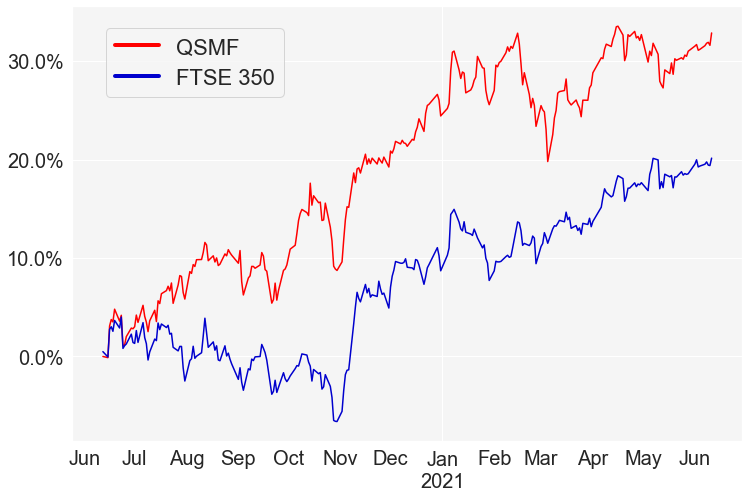

In [84]:
sns.set(font_scale=2,rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(15, 8))

#add the two time series, 
ax.plot(fundreturn.index, fundreturn.SMF, label='QSMF', color='red')
ax.plot(fundreturn.index, fundreturn.NMXIndex, label="FTSE 350",color='mediumblue')


#add a title
#plt.title('FTSE 350 vs QSMF 1 year returns, 11/06/21')


myfmt(ax)
ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
fig.set_size_inches(12, 8)
fig.savefig("LineGraph.pdf", bbox_inches='tight',)